# **Fake News Detection**

## **Loading and Labeling the Datasets**

This code block loads two datasets containing fake and real news articles using **pandas**. The goal is to prepare the data for further processing by adding labels and displaying dataset information.

#### **🔹 Key Steps:**
1. **Load CSV Files:**
   - `fake.csv`: Contains fake news articles.
   - `true.csv`: Contains real news articles.

2. **Assign Labels:**
   - A new column **"label"** is added to both datasets.
   - **Fake news** is labeled as `0`.
   - **Real news** is labeled as `1`.

3. **Display Dataset Information:**
   - `info()` is called on both datasets to check for missing values and data types.
   - This helps verify that the datasets have been loaded correctly before further processing.

In [1]:
import pandas as pd

# Load datasets
fake_df = pd.read_csv("fake.csv")
true_df = pd.read_csv("true.csv")

# Add a label column: 1 for real, 0 for fake
fake_df["label"] = 0
true_df["label"] = 1

# Display dataset info
print("Fake News Dataset Info:")
print(fake_df.info())
print("\nTrue News Dataset Info:")
print(true_df.info())

Fake News Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
 4   label    23481 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 917.4+ KB
None

True News Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
 4   label    21417 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 836.7+ KB
None


This code block displays the first few rows of the fake and real news datasets to get an initial look at the structure and content of the data.

In [2]:
# Show first few rows
print("\nSample Fake News Data:")
print(fake_df.head())

print("\nSample True News Data:")
print(true_df.head())


Sample Fake News Data:
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  label  
0  December 31, 2017      0  
1  December 31, 2017      0  
2  December 30, 2017      0  
3  December 29, 2017      0  
4  December 25, 2017      0  

Sample True News Data:
                                               tit

### **Merging Datasets and Analyzing Class Distribution**

This code block combines the fake and real news datasets into a single dataframe and visualizes the distribution of fake vs. real news.

#### **🔹 Key Steps:**

1. **Merge the Datasets:**
   - Both `fake_df` and `true_df` are concatenated into a single dataframe `df`.
   - The index is reset to ensure a continuous sequence.

2. **Check Class Distribution:**
   - The `value_counts()` method is used to count the number of fake (0) and real (1) news articles.
   - The distribution is printed to detect potential class imbalances.

3. **Visualize Class Distribution:**
   - A bar chart is plotted using Matplotlib to show the number of fake and real news articles.
   - Red represents fake news, and green represents real news.
   - The visualization helps understand the dataset balance before model training.

Class Distribution:
 label
0    23481
1    21417
Name: count, dtype: int64


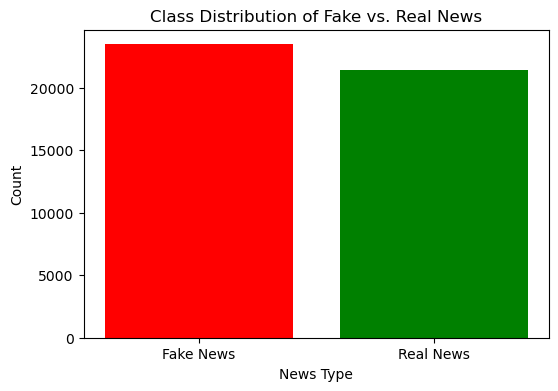

In [ ]:
import matplotlib.pyplot as plt

# Combine both datasets
df = pd.concat([fake_df, true_df], axis=0).reset_index(drop=True)

# Check class distribution
class_counts = df["label"].value_counts()

# Print class distribution
print("Class Distribution:\n", class_counts)

# Plot class distribution
plt.figure(figsize=(6,4))
plt.bar(["Fake News", "Real News"], class_counts, color=['red', 'green'])
plt.xlabel("News Type")
plt.ylabel("Count")
plt.title("Class Distribution of Fake vs. Real News")
plt.show()

### **Analyzing Text Length in Fake vs. Real News**

This code block examines the text length distribution in fake and real news articles to identify patterns that could help in classification.

#### **🔹 Key Steps:**

1. **Determine the Text Column:**
   - The script checks whether the dataset has a column named `text`. If not, it selects the first column as the text content column.

2. **Calculate Text Length:**
   - A new column `text_length` is created, storing the number of words in each article.
   - The length is determined by splitting the text into words and counting them.

3. **Visualize Text Length Distribution:**
   - A histogram is plotted using Seaborn to compare text lengths for fake vs. real news.
   - Fake news is represented in red, real news in green.
   - A Kernel Density Estimate (KDE) curve is included to highlight trends.

4. **Compute Average Text Length:**
   - The mean text length for fake and real news articles is calculated and printed.
   - This helps understand whether fake news articles tend to be shorter or longer than real news.

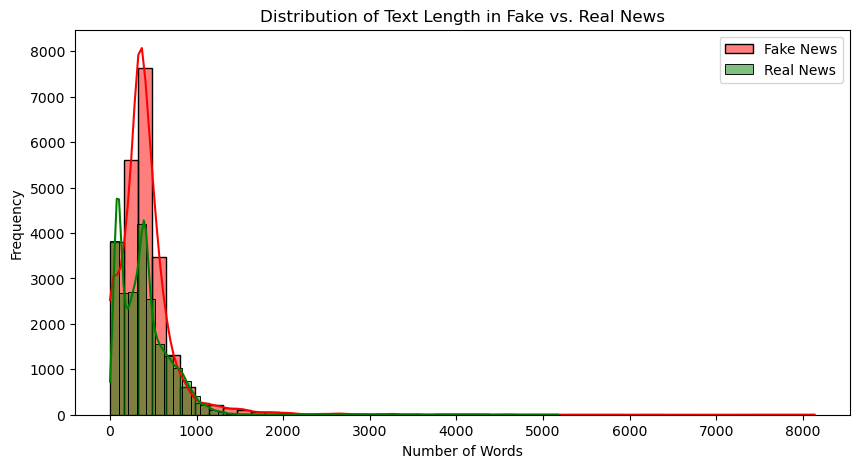

Average text length (words) in Fake News: 423.20
Average text length (words) in Real News: 385.64


In [4]:
import seaborn as sns

# Check if dataset has a 'text' column, otherwise find the main content column
text_column = "text" if "text" in df.columns else df.columns[0]  

# Add a new column for text length
df["text_length"] = df[text_column].apply(lambda x: len(str(x).split()))

# Plot text length distribution for Fake and Real news
plt.figure(figsize=(10, 5))
sns.histplot(df[df["label"] == 0]["text_length"], color="red", label="Fake News", bins=50, kde=True)
sns.histplot(df[df["label"] == 1]["text_length"], color="green", label="Real News", bins=50, kde=True)
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.title("Distribution of Text Length in Fake vs. Real News")
plt.legend()
plt.show()

# Print average text length per class
avg_fake = df[df["label"] == 0]["text_length"].mean()
avg_real = df[df["label"] == 1]["text_length"].mean()

print(f"Average text length (words) in Fake News: {avg_fake:.2f}")
print(f"Average text length (words) in Real News: {avg_real:.2f}")

### **Visualizing Common Words in Fake vs. Real News**

This code block generates word clouds to highlight the most frequently used words in fake and real news articles, providing insights into textual patterns.

#### **🔹 Key Steps:**

1. **Define a Text Cleaning Function:**
   - Converts text to lowercase.
   - Removes punctuation and non-word characters using regex.
   - Ensures consistency in text processing.

2. **Apply Text Cleaning:**
   - The function is applied to the `text_column` to create a new column, `cleaned_text`.
   - This cleaned text is used for further analysis.

3. **Separate Fake and Real News Content:**
   - Fake news text is combined into a single string.
   - Real news text is also combined separately.
   - This allows for independent analysis of the two categories.

4. **Generate Word Clouds:**
   - Two word clouds are generated:
     - One for fake news (left panel).
     - One for real news (right panel).
   - Word clouds visually display the most frequently occurring words.
   - The larger the word, the more frequently it appears in the dataset.

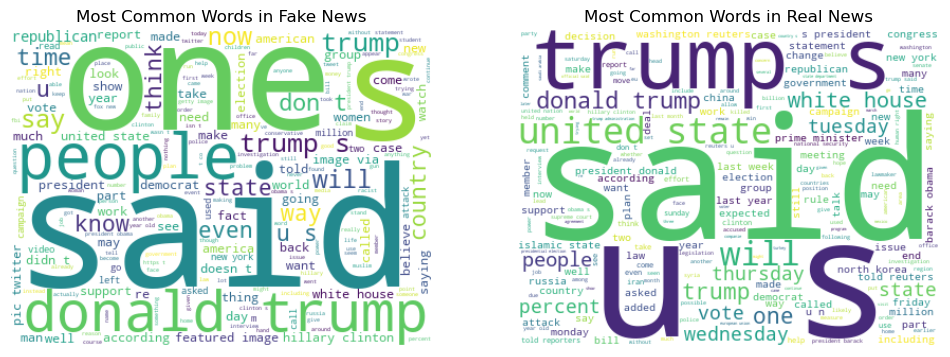

In [5]:
from collections import Counter
import re
from wordcloud import WordCloud

# Function to clean text (remove punctuation, numbers, etc.)
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\W+', ' ', text)  # Remove non-word characters
    return text

# Apply text cleaning
df["cleaned_text"] = df[text_column].apply(clean_text)

# Separate fake and real news text
fake_text = " ".join(df[df["label"] == 0]["cleaned_text"])
real_text = " ".join(df[df["label"] == 1]["cleaned_text"])

# Generate word clouds
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
wordcloud_fake = WordCloud(width=400, height=300, background_color='white').generate(fake_text)
plt.imshow(wordcloud_fake, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Fake News")

plt.subplot(1, 2, 2)
wordcloud_real = WordCloud(width=400, height=300, background_color='white').generate(real_text)
plt.imshow(wordcloud_real, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Real News")

plt.show()

### **Preprocessing Text for Fake News Detection**

This code block applies **Natural Language Processing (NLP)** techniques to clean and standardize text data before model training.

#### **🔹 Key Steps:**

1. **Download NLTK Resources:**
   - `stopwords`: A list of common words (e.g., "the", "is") that provide little meaning.
   - `punkt`: A tokenizer to split text into words.
   - `wordnet`: A lexical database for lemmatization.

2. **Initialize NLP Tools:**
   - **Stopwords:** Removes common English words that do not add value to classification.
   - **Lemmatizer:** Converts words to their base form (e.g., "running" → "run").

3. **Define the Preprocessing Function:**
   - Converts text to **lowercase**.
   - Removes **special characters, punctuation, and numbers**.
   - Tokenizes text into words.
   - Removes stopwords and **lemmatizes words**.
   - Joins processed words back into a cleaned text string.

4. **Apply Preprocessing to the Dataset:**
   - The `preprocess_text()` function is applied to the `text_column`.
   - Creates a new column **`cleaned_text`** with the processed text.

5. **Display Cleaned Samples:**
   - Prints sample cleaned text from **fake news** and **real news** categories.
   - Helps in verifying preprocessing effectiveness before feature extraction.

In [6]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function for text preprocessing
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove special characters, numbers, and punctuation
    text = re.sub(r'\W+', ' ', text)
    
    # Tokenize words
    words = word_tokenize(text)
    
    # Remove stopwords and lemmatize words
    cleaned_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    
    # Join words back into a cleaned text string
    return " ".join(cleaned_words)

# Apply preprocessing to the dataset
df["cleaned_text"] = df[text_column].apply(preprocess_text)

# Display some cleaned text samples
print("Sample Cleaned Text (Fake News):")
print(df[df["label"] == 0]["cleaned_text"].head())

print("\nSample Cleaned Text (Real News):")
print(df[df["label"] == 1]["cleaned_text"].head())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\manus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\manus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Sample Cleaned Text (Fake News):
0    donald trump wish american happy new year leav...
1    house intelligence committee chairman devin nu...
2    friday revealed former milwaukee sheriff david...
3    christmas day donald trump announced would bac...
4    pope francis used annual christmas day message...
Name: cleaned_text, dtype: object

Sample Cleaned Text (Real News):
23481    washington reuters head conservative republica...
23482    washington reuters transgender people allowed ...
23483    washington reuters special counsel investigati...
23484    washington reuters trump campaign adviser geor...
23485    seattle washington reuters president donald tr...
Name: cleaned_text, dtype: object


### **Transforming Text into Numerical Features using TF-IDF**

This code block converts processed text into numerical features using **Term Frequency-Inverse Document Frequency (TF-IDF)**, which helps in identifying important words for classification.

#### **🔹 Key Steps:**

1. **Initialize TF-IDF Vectorizer:**
   - Limits to the **5000 most important words** (`max_features=5000`).
   - Converts text into weighted numerical values, emphasizing important words.

2. **Transform Cleaned Text:**
   - Applies **TF-IDF transformation** to the `cleaned_text` column.
   - Stores the result in `X_tfidf`, which will be used as input for machine learning models.

3. **Convert a Small Sample to a Readable Format:**
   - Extracts the first **5 rows** of transformed TF-IDF values.
   - Converts them into a pandas **DataFrame** with feature names.

4. **Display Sample TF-IDF Values:**
   - Shows the **first 10 words' TF-IDF scores** from the sample.
   - Helps in verifying that text has been successfully converted into numerical format.

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer (limit to 5000 most important words)
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Transform cleaned text into TF-IDF vectors
X_tfidf = tfidf_vectorizer.fit_transform(df["cleaned_text"])

# Convert a small sample (first 5 rows) to a DataFrame
tfidf_sample_df = pd.DataFrame(X_tfidf[:5].toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display only the first 10 columns of the sample for readability
print("Sample TF-IDF Values (First 5 rows, 10 words):")
print(tfidf_sample_df.iloc[:, :10])  # Show first 10 words only

Sample TF-IDF Values (First 5 rows, 10 words):
    00  000   10  100        11   12  120   13   14   15
0  0.0  0.0  0.0  0.0  0.031627  0.0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0
3  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0
4  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0


### **Splitting Data into Training and Testing Sets**

This code block divides the dataset into training and testing sets to ensure that the model is evaluated on unseen data, improving its generalization ability.

#### **🔹 Key Steps:**

1. **Define Features and Target Variable:**
   - `X_tfidf`: The numerical features obtained from TF-IDF transformation.
   - `y`: The target variable (`label`), where **0 represents fake news** and **1 represents real news**.

2. **Perform Train-Test Split:**
   - Splits the dataset into **80% training data** and **20% testing data** (`test_size=0.2`).
   - Ensures that the label distribution remains balanced using **stratification** (`stratify=y`).
   - Uses a fixed **random_state=42** to ensure reproducibility.

3. **Print Confirmation:**
   - Displays the shape of the training and testing sets to verify successful splitting.

In [10]:
from sklearn.model_selection import train_test_split

# Define features (TF-IDF) and labels
y = df["label"]  # Target variable

# Perform train-test split
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42, stratify=y
)

# Print confirmation
print(f"✅ Train-Test Split Completed: X_train={X_train_tfidf.shape}, X_test={X_test_tfidf.shape}")

✅ Train-Test Split Completed: X_train=(35918, 5000), X_test=(8980, 5000)


### **Training and Evaluating the Logistic Regression Model**

This code block trains a **Logistic Regression model** on the processed text data and evaluates its performance using various classification metrics.

#### **🔹 Key Steps:**

1. **Initialize the Logistic Regression Model:**
   - Uses `LogisticRegression(max_iter=500)` to ensure proper convergence during training.

2. **Train the Model with Progress Tracking:**
   - The model is trained using `fit()` on the **TF-IDF-transformed training data (`X_train_tfidf`)**.
   - Uses `tqdm` to provide a visual indicator of training progress.

3. **Make Predictions on the Test Set:**
   - The trained model predicts labels for `X_test_tfidf`.

4. **Evaluate the Model:**
   - Computes **accuracy** using `accuracy_score()`.
   - Prints a **classification report** with precision, recall, and F1-score.
   - Displays a **confusion matrix** to analyze correct and incorrect predictions.

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tqdm import tqdm

# Initialize Logistic Regression Model
log_reg = LogisticRegression(max_iter=500)  # Increased max_iter to ensure convergence

# Track progress during model fitting
print("🔄 Training Logistic Regression Model...")
with tqdm(total=1, desc="Training Progress") as pbar:
    log_reg.fit(X_train_tfidf, y_train)
    pbar.update(1)  # Progress update

# Predict on the test set
y_pred = log_reg.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Logistic Regression Model Accuracy: {accuracy:.4f}")

# Print Classification Report
print("\n🔍 Classification Report:")
print(classification_report(y_test, y_pred))

# Print Confusion Matrix
print("\n🟦 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

🔄 Training Logistic Regression Model...


Training Progress: 100%|█████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.97it/s]


✅ Logistic Regression Model Accuracy: 0.9851

🔍 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4696
           1       0.98      0.99      0.98      4284

    accuracy                           0.99      8980
   macro avg       0.98      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980


🟦 Confusion Matrix:
[[4608   88]
 [  46 4238]]


Exporting the model for deployment

In [12]:
import joblib

# Save the trained model
joblib.dump(log_reg, "logistic_model.pkl")

# Save the TF-IDF vectorizer
joblib.dump(tfidf_vectorizer, "tfidf_vectorizer.pkl")

print("✅ Model and vectorizer saved successfully!")

✅ Model and vectorizer saved successfully!


In [13]:
# Load the saved model & vectorizer
loaded_model = joblib.load("logistic_model.pkl")
loaded_vectorizer = joblib.load("tfidf_vectorizer.pkl")

# Test on a sample news article
sample_text = ["Breaking news: Scientists discover a new planet with alien life!"]

# Transform text using saved vectorizer
sample_tfidf = loaded_vectorizer.transform(sample_text)

# Make a prediction
prediction = loaded_model.predict(sample_tfidf)[0]

# Print result
print("📰 Prediction:", "🟢 Real News" if prediction == 1 else "🔴 Fake News")

📰 Prediction: 🔴 Fake News
